In [3]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

from Backtest.backtest import Backtest
from Backtest.data import OHLCDataHandler
from ADXStrategy import ADXStrategy
from Backtest.open_json_gz_files import open_json_gz_files
from Backtest.generate_bars import generate_bars

In [4]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import hyperopt.pyll.stochastic

In [5]:
def run_backtest(config, trading_data, ohlc_data, window):
    window = int(window)
    config['title'] = "ADXStrategy" + "_" + str(window)
    print("---------------------------------")
    print(config['title'])
    print("---------------------------------")

    events_queue = queue.Queue()

    data_handler = OHLCDataHandler(
        config, events_queue,
        trading_data=trading_data, ohlc_data=ohlc_data
    )
    strategy = ADXStrategy(config, events_queue, data_handler,
                           window=window)

    backtest = Backtest(config, events_queue, strategy,
                        data_handler=data_handler)

    results = backtest.start_trading()

    # dict_ans = {
    #     "window": window,
    #     "Sharpe Ratio": [results['sharpe']],
    #     "Total Returns": [(results['cum_returns'][-1] - 1)],
    #     "Max Drawdown": [(results["max_drawdown"] * 100.0)],
    #     "Max Drawdown Duration": [(results['max_drawdown_duration'])],
    #     "Trades": [results['trade_info']['trading_num']],
    #     "Trade Winning": [results['trade_info']['win_pct']],
    #     "Average Trade": [results['trade_info']['avg_trd_pct']],
    #     "Average Win": [results['trade_info']['avg_win_pct']],
    #     "Average Loss": [results['trade_info']['avg_loss_pct']],
    #     "Best Trade": [results['trade_info']['max_win_pct']],
    #     "Worst Trade": [results['trade_info']['max_loss_pct']],
    #     "Worst Trade Date": [results['trade_info']['max_loss_dt']],
    #     "Avg Days in Trade": [results['trade_info']['avg_dit']]
    # }
    # return pd.DataFrame(dict_ans)
    return -1 * (results['cum_returns'][-1] - 1)

In [6]:
def f(params):
    config = {
        "csv_dir": "C:/backtest/Binance",
        "out_dir": "C:/backtest/results/ADXStrategy",
        "title": "ADXStrategy",
        "is_plot": False,
        "save_plot": False,
        "save_tradelog": False,
        "start_date": pd.Timestamp("2017-07-01T00:0:00", freq="60" + "T"),  # str(freq) + "T"
        "end_date": pd.Timestamp("2018-04-01T00:00:00", freq="60" + "T"),
        "equity": 1.0,
        "freq": 60,  # min
        "commission_ratio": 0.001,
        "suggested_quantity": None,  # None or a value
        "max_quantity": None,  # None or a value, Maximum purchase quantity
        "min_quantity": None,  # None or a value, Minimum purchase quantity
        "min_handheld_cash": None,  # None or a value, Minimum handheld funds
        "exchange": "Binance",
        "tickers": ['BTCUSDT']
    }
    # trading_data = {}
    # for ticker in config['tickers']:
    #     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
    #     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

    ohlc_data = {}
    for ticker in config['tickers']:
        # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
        ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '_OHLC_60min.h5', key=ticker)

    trading_data = None
    
    window = params['window']
    val = run_backtest(config, trading_data, ohlc_data, window)
    return {'loss': val, 'status': STATUS_OK}

In [7]:
space = {
    'window': hp.randint('window', 240)
}

In [61]:
# print(hyperopt.pyll.stochastic.sample(space))

In [8]:
trials = Trials()

In [9]:
best = fmin(fn=f, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

---------------------------------
ADXStrategy_150
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.5692713046
Max Drawdown: 49.0749510702
Max Drawdown Duration: 2736
Total Returns: 0.1380245086
---------------------------------
Trades: 50
Trade Winning: 38%
Average Trade: 0.65%
Average Win: 5.91%
Average Loss: -2.57%
Best Trade: 24.01%
Worst Trade: -10.28%
Worst Trade Date: 1 days 20:00:00
Avg Days in Trade: 1 days 04:54:00
---------------------------------
---------------------------------
ADXStrategy_208
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
----------------------------

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.3357112878
Max Drawdown: 48.6370089179
Max Drawdown Duration: 2736
Total Returns: 0.0291696295
---------------------------------
Trades: 51
Trade Winning: 31%
Average Trade: 0.53%
Average Win: 7.03%
Average Loss: -2.44%
Best Trade: 43.91%
Worst Trade: -11.97%
Worst Trade Date: 4 days 21:00:00
Avg Days in Trade: 1 days 02:41:11
---------------------------------
---------------------------------
ADXStrategy_135
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.5994362683
Max Drawdown: 56.0209054091
Max Drawdown Duration: 2736
Total 

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: nan
Max Drawdown: 0.0000000000
Max Drawdown Duration: 0
Total Returns: 0.0000000000
---------------------------------
Trades: 0
Trade Winning: N/A
Average Trade: N/A
Average Win: N/A
Average Loss: N/A
Best Trade: N/A
Worst Trade: N/A
Worst Trade Date: 0
Avg Days in Trade: 0
---------------------------------
---------------------------------
ADXStrategy_214
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.3186540902
Max Drawdown: 65.0354645962
Max Drawdown Duration: 2736
Total Returns: -0.2435325087
--------------------------------

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.9934756317
Max Drawdown: 24.6425470904
Max Drawdown Duration: 838
Total Returns: 1.3826900903
---------------------------------
Trades: 125
Trade Winning: 42%
Average Trade: 1.05%
Average Win: 5.05%
Average Loss: -1.89%
Best Trade: 31.17%
Worst Trade: -9.52%
Worst Trade Date: 0 days 03:00:00
Avg Days in Trade: 0 days 13:11:31
---------------------------------
---------------------------------
ADXStrategy_185
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6369772926
Max Drawdown: 45.7669577364
Max Drawdown Duration: 2736
Total R

---------------------------------
ADXStrategy_21
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.9934756317
Max Drawdown: 24.6425470904
Max Drawdown Duration: 838
Total Returns: 1.3826900903
---------------------------------
Trades: 125
Trade Winning: 42%
Average Trade: 1.05%
Average Win: 5.05%
Average Loss: -1.89%
Best Trade: 31.17%
Worst Trade: -9.52%
Worst Trade Date: 0 days 03:00:00
Avg Days in Trade: 0 days 13:11:31
---------------------------------
---------------------------------
ADXStrategy_143
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
------------------------------

In [15]:
best

{'window': 21}

In [26]:
for trial in trials.trials:
    print(trial['misc']['vals'], "\t",trial['result']['loss'])

{'window': [150]} 	 -0.1380245086258456
{'window': [208]} 	 0.16686849660667735
{'window': [184]} 	 -0.18583860431773713
{'window': [20]} 	 -1.3075170322687915
{'window': [115]} 	 -0.3921219720077256
{'window': [58]} 	 -0.26118205150561535
{'window': [145]} 	 -0.3907858604140926
{'window': [20]} 	 -1.3075170322687915
{'window': [158]} 	 -0.09123732425700348
{'window': [63]} 	 -0.2793531437705059
{'window': [20]} 	 -1.3075170322687915
{'window': [234]} 	 -0.02916962947667101
{'window': [135]} 	 -0.152705669727645
{'window': [231]} 	 0.010915599817559518
{'window': [98]} 	 -0.5572364829825007
{'window': [159]} 	 -0.06106950439419023
{'window': [145]} 	 -0.3907858604140926
{'window': [145]} 	 -0.3907858604140926
{'window': [160]} 	 -0.21382006553499755
{'window': [54]} 	 -0.43461598750930186
{'window': [176]} 	 -0.14692132114234524
{'window': [70]} 	 -0.8514607687492237
{'window': [9]} 	 0.18031198056693043
{'window': [0]} 	 -0.0
{'window': [214]} 	 0.24353250868783427
{'window': [51]} 	 

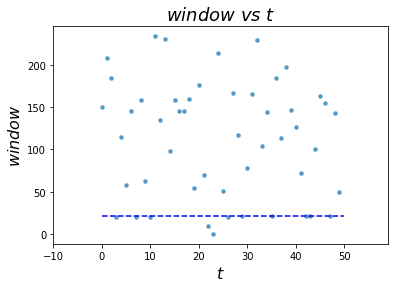

In [16]:
f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['window'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$window$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$window$', fontsize=16)
plt.hlines(best['window'], 0, 50, hold=None,color='blue',linestyle="--")

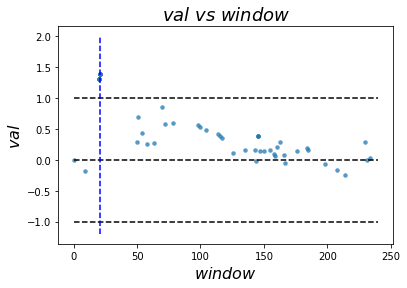

In [28]:
f, ax = plt.subplots(1)
xs = [t['misc']['vals']['window'] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $window$ ', fontsize=18)
ax.set_xlabel('$window$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)
plt.hlines(0, 0, 240, hold=None,color='black',linestyle="--")
plt.hlines(-1, 0, 240, hold=None,color='black',linestyle="--")
plt.hlines(1, 0, 240, hold=None,color='black',linestyle="--")
plt.vlines(best['window'], -1.2, 2, hold=None,color='blue',linestyle="--")